# Titanic Competition

Titanic. This movie still holds the record for the most awarded film ever (sharing it with TLotR and Ben-Hur). Directed by James Cameron, it went on to win 11 Oscars. 

In the film, we see Jack and Rose fall in love just to see them fall apart due to disgrace. Likewise, in the real events after which the movie was made, many of the Titanic passengers had the same disgraceful end that Jack had. Some other people got to survive. We'll be trying now, more than 84 years after the sinking of the infamous ocean liner, will be applying Machine Learning to try to predict which passengers got to surive and which ones passed away.

#### Small note
I recently finished the Machine Learning course by Stanford University and professor Andrew Ng. I am also, independently, doing this as a capstone project for myself, with the purpose of trying to apply and seal some of the knowledge I got from it. I highly recommend it to everyone new to ML.

(The course was in MATLab/Octave so I will be using this to help me get used to Python)

## STEPS taken for the Project

* Defining the problem
* Importing Libraries & Loading Data
* Data Cleaning
    * Handling Missing Data
* Data Processing
* Correlation Analysis
    * Reduce Linear Dependency and Cardinality
* Modeling
    * Logistic Regression
    * Support Vector Machine
* Testing

### Defining the problem
We are given two datasets for training and testing. The **goal** is to make a **supervised learning** **model** using the training set to **predict** wheter a passenger in the testing set **survived or not**.

### Importing Libraries & Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"C:\Users\isi37\Desktop\Projects\Titanic\train.csv")
test = pd. read_csv(r"C:\Users\isi37\Desktop\Projects\Titanic\test.csv")

In [3]:
print("Train Rows:", train.shape[0], "  Train Columns:", train.shape[1])

train.head()

Train Rows: 891   Train Columns: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Test Rows:", test.shape[0], "  Test Columns:",test.shape[1])

test.head()

Test Rows: 418   Test Columns: 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Cleaning
First, we will joing both sets for easier and faster cleaning.

Then we will look for missing data and handle it as needed.

We will also drop the PassengerID column. Because we already have the Name column to identify passengers.

In [5]:
df = pd.concat([train, test], ignore_index=True,sort=False)
df.drop("Survived", axis=1, inplace=True)

,Features,MissingPercent
2,Cabin,77.463713
0,Age,20.091673
3,Embarked,0.152788
1,Fare,0.076394


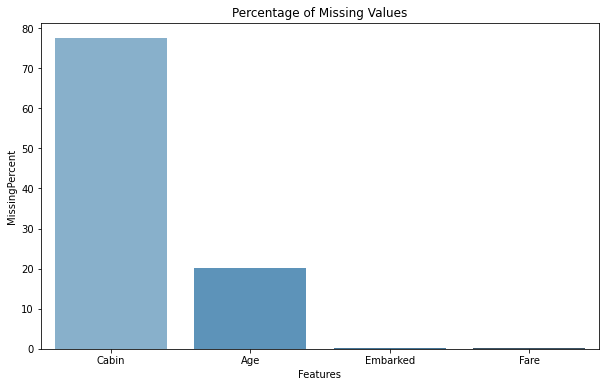

In [6]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent, palette="Blues_d").set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(df)

The amount of data missing in the **Cabin** column is took high, *77.46%*. We'll simply drop the entire column. For **Age**, we'll fill NaN values with the median of the age in the class the passenger belongs to. **Fare** will be filled with the median as well. And finally, the **Embarked** column will be filled with the most common category, since, as we'll see, it's way more common than the other two categories there.

In [7]:
#Dropping Cabin column
df.drop("Cabin", axis=1, inplace=True)

In [8]:
ageNull = df["Age"].isnull()

#Indexes of each class the passengers with age null values belong
id1 = (ageNull) & (df["Pclass"] == 1)
id2 = (ageNull) & (df["Pclass"] == 2)
id3 = (ageNull) & (df["Pclass"] == 3)

#Filling with median
df.loc[id1, 'Age']=df[df["Pclass"]==1]["Age"].median()
df.loc[id2, 'Age']=df[df["Pclass"]==2]["Age"].median()
df.loc[id3, 'Age']=df[df["Pclass"]==3]["Age"].median()

In [9]:
df.Fare.fillna(df.Fare[df.Pclass == 3].median() , inplace=True)

In [10]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

*S* most common.

In [11]:
df["Embarked"].fillna("S", inplace=True)

In [12]:
#Checking everything is good now
get_missings(df)

False

No more missing values.

In [13]:
df.shape

(1309, 10)

In [14]:
#Already have name column for identification
df.drop("PassengerId", axis=1, inplace=True)

### Data Processing
In this step we will be parsing the Title, if possessed, of the passengers from the Name columnd. We will also get the surname of each one, trying to get a better fit.

In [15]:
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.lower()

In [16]:
df["Title"]=df["Name"].apply(lambda x: x[x.find(', ')+len(', '):x.rfind('.')])

#There was a problem with this passenger so we had to manually change it
df["Title"]=df["Title"].replace("mrs. martin (elizabeth l","mrs")

In [17]:
df["Title"].value_counts()

mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: Title, dtype: int64

Surname

In [18]:
df["Surname"]=df["Name"].str.split(",").str.get(0)

In [19]:
df.drop("Name",axis=1,inplace=True)

### Correlations & more processing
We'll check **correlations** between *features* and *target* and between features only. Then, to reduce **Linear Dependency** and **Cardinality** we will look into creating new features and dropping old ones.

#### Correlation with Target
Let's first have a look at the relation between the features in the training set and the Target variable or *y*.

In [20]:
#Checking the last train example
train.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
y = train["Survived"]

# 891 last train passenger
df[:891].corrwith(y).sort_values(ascending=False)

Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.046230
Pclass   -0.338481
dtype: float64

#### Correlations between features
Now let's look to the relations ocurring inside the features.

<AxesSubplot:>

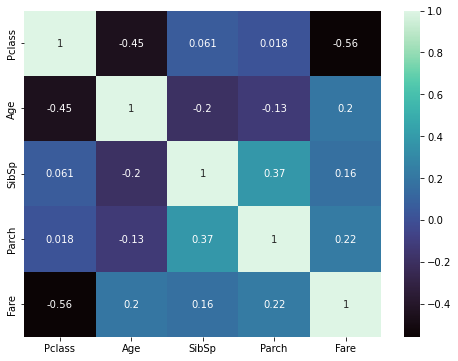

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap="mako")

**Possitive** correlations:
* Fare and Survived
* SibSp and Parch

**Negative** Correlations:
* Pclass and Survived
* Pclass and Fare
* Pclass and Age

To try to eliminate some linear dependency, we'll create a new feature: *Relatives*.

Text(0, 0.5, 'The Number Of Passengers')

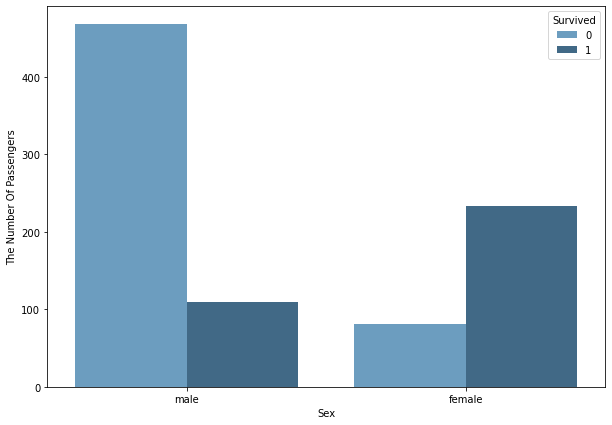

In [23]:
#Setting colors for graphs
palette="Blues_d"


plt.figure(figsize=(10,7))
sns.countplot(x=df[:891]['Sex'],hue=train.Survived,palette=palette)
plt.ylabel('The Number Of Passengers')

There's also a high correlation with sex and target.

In [42]:
df['Relatives'] = df['SibSp'] + df['Parch']

Text(0, 0.5, 'The Number Of Passengers')

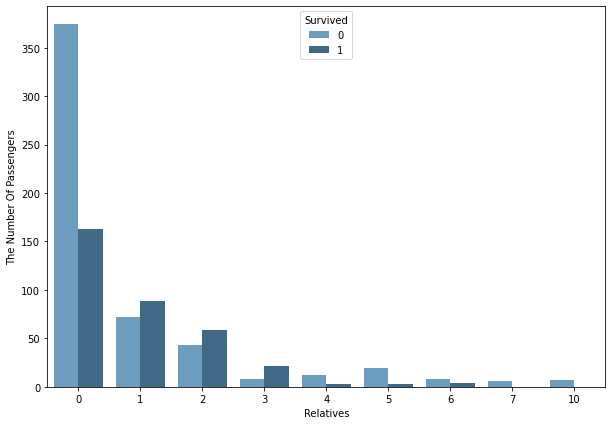

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x=df[:891]['Relatives'],hue=train.Survived,palette=palette)
plt.ylabel('The Number Of Passengers')

Text(0, 0.5, 'Number of Passengers')

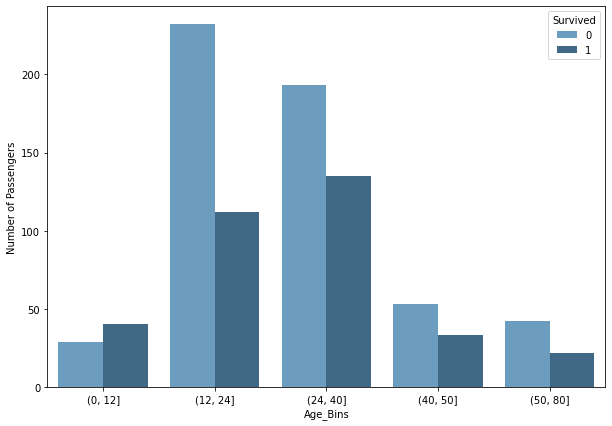

In [26]:
bins = [0, 12,24,40,50,80]
df['Age_Bins'] = pd.cut(df['Age'], bins)

plt.figure(figsize=(10,7))
sns.countplot(x=df[:891]["Age_Bins"], hue=train["Survived"], palette=palette)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

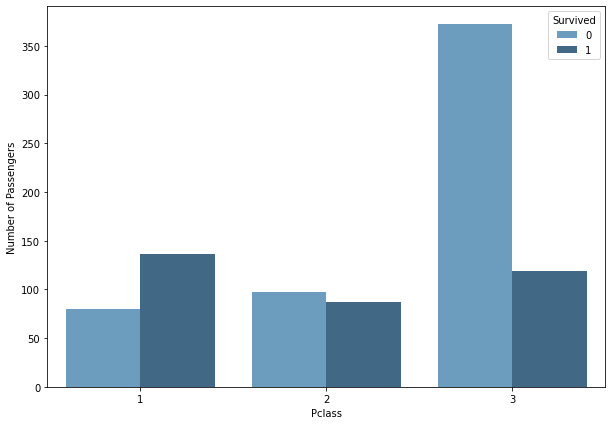

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x=df[:891]["Pclass"], hue=train["Survived"], palette=palette)
plt.ylabel("Number of Passengers")

C:\Users\isi37\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Passengers')

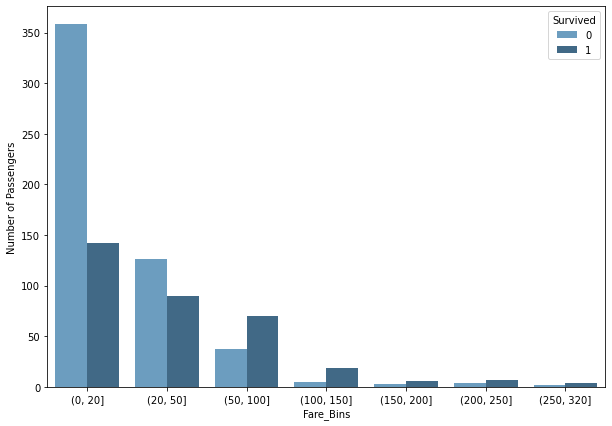

In [28]:
bins = [0,20,50,100,150,200,250,320]
df['Fare_Bins'] = pd.cut(df['Fare'], bins)

plt.figure(figsize=(10,7))
sns.countplot(df[:891]["Fare_Bins"], hue=train.Survived, palette=palette)
plt.ylabel("Number of Passengers")

As *Fare, Pclass* and *Age* are all interrelated, we'll also get a new feature to remove linear dependency.

In [29]:
df['Fare/Pclass/Age']=(df['Fare'] / df['Pclass'] ) / (df['Age'])

In order to reduce cardinality, we'll also get dummy variables.

In [30]:
dropList = ["Age_Bins", "Fare", "Pclass", "Age", "Parch", "SibSp", "Surname"]
df_pre_dummies = df.drop(dropList, axis=1)

df_dummies = pd.get_dummies(df_pre_dummies,drop_first=True)

In [31]:
df_dummies.head()

,Relatives,Fare/Pclass/Age,Sex_male,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Title_ms,Title_rev,Title_sir,Title_the countess,"Fare_Bins_(20, 50]","Fare_Bins_(50, 100]","Fare_Bins_(100, 150]","Fare_Bins_(150, 200]","Fare_Bins_(200, 250]","Fare_Bins_(250, 320]"
0,1,0.109848,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.875876,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.101603,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.517143,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0.076667,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling
Now that everything is clean and tidy we can start training our models. The problem at hand is a **classification** problem. We'll be using **Logistic Regression** and a **Support Vector Machine** (*SVC*).
First we'll divide back into **training** and **test** sets, and then create a new **Cross Validation** set to check for **bias** (*overfitting*) or **variance** (*underfitting*).

We'll also use **feature scaling** to improve convergence.

In [32]:
#Getting back Training set
train_df = df_dummies[:891].copy()
train_df["Survived"] = train["Survived"].copy()

#Getting back Test set
test_df=df_dummies[891:].copy()

In [33]:
train_df.head()

,Relatives,Fare/Pclass/Age,Sex_male,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Title_rev,Title_sir,Title_the countess,"Fare_Bins_(20, 50]","Fare_Bins_(50, 100]","Fare_Bins_(100, 150]","Fare_Bins_(150, 200]","Fare_Bins_(200, 250]","Fare_Bins_(250, 320]",Survived
0,1,0.109848,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.875876,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.101603,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.517143,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0.076667,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df.head()

,Relatives,Fare/Pclass/Age,Sex_male,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,...,Title_ms,Title_rev,Title_sir,Title_the countess,"Fare_Bins_(20, 50]","Fare_Bins_(50, 100]","Fare_Bins_(100, 150]","Fare_Bins_(150, 200]","Fare_Bins_(200, 250]","Fare_Bins_(250, 320]"
891,0,0.075644,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,1,0.049645,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,0,0.078125,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0.106944,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,2,0.186174,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cross Validation set

In [35]:
X_train, X_cv, y_train, y_cv = train_test_split(train_df, train_df["Survived"], test_size=0.2)
X_train.drop("Survived", axis=1, inplace=True)
X_cv.drop("Survived", axis=1, inplace=True)

X_test = test_df.copy()

print("Training set observations:", X_train.shape[0], "  CrossValidation set observations:", X_cv.shape[0])

Training set observations: 712   CrossValidation set observations: 179


C:\Users\isi37\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Feature scaling

In [36]:
scaler = StandardScaler() #z = (x-mean)/std

X_train_scaled = scaler.fit_transform(X_train) #fit_transform gets mean and std of input
X_cv_scaled = scaler.transform(X_cv) #transform uses mean and std of the training set, so it doesn't interfere with model's bias.
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [37]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
print("Train Score:", model.score(X_train_scaled, y_train))

y_hat_train = model.predict(X_train_scaled)

predictions_train = pd.DataFrame({"y":y_train, "y_hat":y_hat_train})
predictions_train

Train Score: 0.9957865168539326


,y,y_hat
435,1,1
226,1,1
775,0,0
259,1,1
2,1,1
...,...,...
804,1,1
577,1,1
618,1,1
632,1,1


In [38]:
print("CV Score:", model.score(X_cv_scaled, y_cv))

y_hat_cv = model.predict(X_cv_scaled)

predictions_cv = pd.DataFrame({"y":y_cv, "y_hat":y_hat_cv})
predictions_cv

CV Score: 0.8547486033519553


,y,y_hat
133,1,1
829,1,1
665,0,0
520,1,1
279,1,1
...,...,...
421,0,0
733,0,0
33,0,0
861,0,0


### Support Vector Machine (*SVC*)

In [39]:
SV_model = SVC()

SV_model.fit(X_train_scaled, y_train)
print("SVC_Train Score:", SV_model.score(X_train_scaled, y_train))

SV_y_hat_train = SV_model.predict(X_train_scaled)

SV_predictions_train = pd.DataFrame({"y":y_train, "y_hat":SV_y_hat_train})
SV_predictions_train


SVC_Train Score: 0.9845505617977528


,y,y_hat
435,1,1
226,1,1
775,0,0
259,1,1
2,1,1
...,...,...
804,1,1
577,1,1
618,1,1
632,1,1


In [40]:
print("SVC_CV Score:", SV_model.score(X_cv_scaled, y_cv))

SV_y_hat_cv = SV_model.predict(X_cv_scaled)

SV_predictions_cv = pd.DataFrame({"y":y_cv, "y_hat":SV_y_hat_cv})
SV_predictions_cv

SVC_CV Score: 0.7932960893854749


,y,y_hat
133,1,1
829,1,1
665,0,0
520,1,1
279,1,0
...,...,...
421,0,0
733,0,0
33,0,0
861,0,0


### Testing

Although both models have fairly the same score on test, **Logistic Regression** seems to be doing a much better job in the cross validation set (around **8%** vs 80%), so we we'll submit those results.

In [47]:
y_hat_test = model.predict(X_test_scaled)

predictions_test = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":y_hat_test})
predictions_test

predictions_test.to_csv("TitanicPredictions.csv", index=False)

### End notes
This was my first ever Machine Learning project. I'm happy with it. I consolidated some of the things learnt in the course mentioned above and I also feel I can handle python libraries better now.

The predictions where **78.94%** correct. For position 1269 in the competition, top 10%.

### Help Sources
* Kaggle Community
* StackOverflow
* Libraries documentation